## First light

So far, we have explored a bit of math to explain how a model airplane might fly if we toss it into the air. This airplane has not power source, it is a simple glider. We have not figured out anything about real flight yet, our model might just as well be a rock! (Actually some of my early models flew as well as a rock!)

We have a few equations that explain how our rock - er - model will move over time:

$$
V_d = V_0 \cos(\alpha)
$$

$$
V_h = V_0 \sin(\alpha)
$$

and

$$
d = V_d t
$$

$$
h = V_h t
$$.

We can plot the hight and the distance traveled over some time inteval using a bit of python.

First, we meed a bit of setup:

In [67]:
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import math
import imageio
import os

Now, lets create a few variables that we will initialize with some test values:

In [68]:
V_0 = 60. # feet per second
alpha = 30 # degrees

We can use our first two equations to find out how fast the model will move up and away. unfortunately, we need to convert the angle into what math majors call *radians*. There are $\pi$ radians in 180 degrees. Python can do the conversions like so: 

In [69]:
V_d = V_0 * math.cos(math.pi/180.0 * alpha)
V_h = V_0 * math.sin(math.pi/180.0 * alpha)

print("V_h = ",V_h, " V_d = ", V_d)

V_h =  29.999999999999996  V_d =  51.96152422706632


That first number, $V_h$ should really just be 30, but computers are never absolutely precise when working with numbers that have a decimal point like what we see.

## Plotting Height and distance

The distance and height traveled over some amount of time are given by our second two equations. here is some Python code (messy, I admit) that will plot these values as time moves along. We will build two Python functions to calculate the values of height and distance.

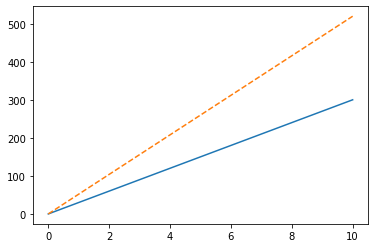

In [70]:
t = np.linspace(0, 10, 100)

def distance(time, v0, alpha):
    alpha_radians = alpha * math.pi/180.0
    return time * v0 * math.cos(alpha_radians)
 
def height(time, v0, alpha):
    alpha_radians = alpha * math.pi/180.0
    return time * v0 * math.sin(alpha_radians)   
plt.plot(t, height(t, V_0, alpha), '-')
plt.plot(t, distance(t, V_0, alpha), '--')
plt.show()

With this graph, we can see how far and how high our model will be for any value of time from 0 to 10! Can we see its flight path? Sure!

This time we will simplify our code a bit by pulling out the caslculation of the flight angle in radians, and use something called *global variables* let our functions use the values for $V_0$ and $\alpha$ without providing them when we use our functions.

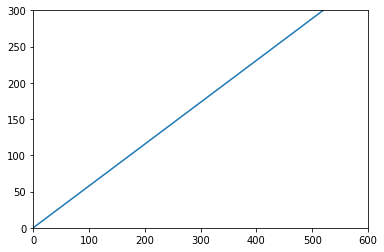

In [71]:
alpha_radians = alpha * math.pi / 180.0

def X_distance(t):
    return V_0 * math.cos(alpha_radians) * t

def Y_height(t):
    return V_0 * math.sin(alpha_radians) * t

x_t = [X_distance(xt) for xt in t]
y_t = [Y_height(xt) for xt in t]

plt.ylim(0,300)
plt.xlim(0,600)
plt.plot(x_t, y_t)
plt.show()

Well! Looks like Newton was right - it is traveling in a straight line. At least until we add in that gravity force later in this lecture!

Let's see if we can animate this (boring) flight.

In [72]:
filenames = []
for i in range(len(t)):
    # plot the line chart
    plt.plot(x_t[:i], y_t[:i])
    plt.ylim(0,300)
    plt.xlim(0,600)
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('first-flight.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

![First Flight](files/first-flight.gif)

Ok, not very exciting, but there it goes, heading off to outer space! At least we are making progress. Now on to gravity!

## Adding Gravity

Newton's second law mentioned the "time rate of change of velocity". That means our vertical velocity $V_h$ is not a constant, but varies with time based on the force being applied, gravity in this instance.

The value of the Earth's gravity is 32.2 teet per seond per second. That means our velocity in the downward direction increases 32.2 feet per second for every second we move. Since our initial velocity was in an upward direction, gravity will slow that velocity, eventually causing it to stop going up and start going down! Let's see how we can display that.

In our previous animation we had a constant velocity $V_h$ and used that to get our height. In this next example, we need to alter the value of $V_h$ as time marches along, using our value for gravity to make the changes. Our set of time values, **t** in the code above, will still represent time, but we need to add in the acceleration to come up with the velocity at each moment. 

The change in velocity will be given by the acceleration times the amount of time we traveled. Since gravity moves the object downward, we will subtract this change from our initial velocity:

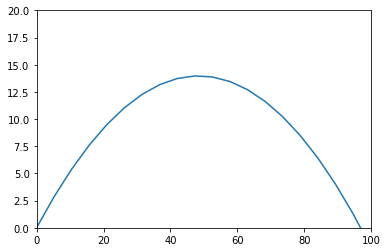

In [79]:
gravity = 32.2
V_0 = 60.0
def velocity(t):
    return gravity * t

def X_distance_gravity(t):
    return V_0 * math.cos(alpha_radians) * t

def Y_height_gravity(t):
    return V_0 * math.sin(alpha_radians) * t - 0.5 * gravity * t * t

x_gt = [X_distance_gravity(xt) for xt in t]
y_gt = [Y_height_gravity(xt) for xt in t]

plt.ylim(0,20)
plt.xlim(0,100)
plt.plot(x_gt, y_gt)
plt.show()

That looks more resonable. The model did not get very high before gravity took over and pull the model back to Earth!

If that graph looka a bit choppy, it is because we looked at the position at fixed points in time. If we look at more points, the curve will get smoother:

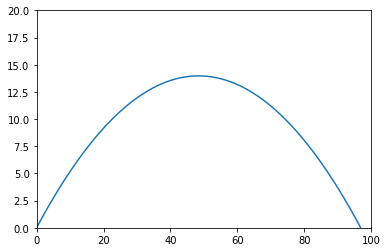

In [80]:
t2 = np.linspace(0, 10, 300)
x_gt2 = [X_distance_gravity(xt) for xt in t2]
y_gt2 = [Y_height_gravity(xt) for xt in t2]

plt.ylim(0,20)
plt.xlim(0,100)
plt.plot(x_gt2, y_gt2)
plt.show()

## Stepping with time

Let's try this another way. In this example we will start off our model at time zero with its initial velocity. We will "fly the model at that speed and distance for a short amount of time which we will call **dt**. After that short flight we will adjust the velocity using our acceleration to calculate the change in velocity. The loop fil be fairly simple, so lets see what we get!

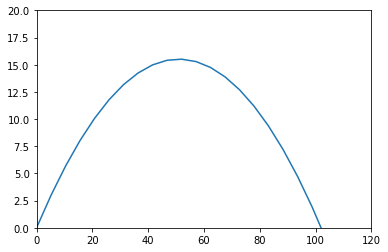

In [81]:
dt = 0.1
vx = 60 * math.cos(alpha_radians) 
vy = 60 * math.sin(alpha_radians)
g = 32.2
x = 0
y = 0

xp =[]
yp = []
angle = 30 * math.pi/180.0

for i in range(100):
    xp.append(x)
    yp .append(y)
    y = y + vy * dt
    x = x + vx * dt
    vy = vy - g * dt
#print(xp)
#print(yp)
plt.ylim(0,20)
plt.xlim(0,120)
plt.plot(xp, yp)
plt.show()
        

This graph is alittle different from our last one. Let's try a smaller time step:

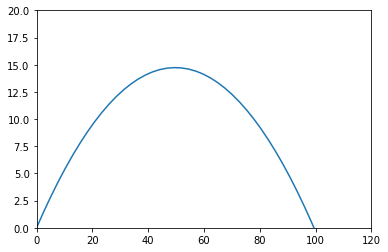

In [82]:
dt = 0.05
x = 0
y = 0
vx = 60 * math.cos(alpha_radians) 
vy = 60 * math.sin(alpha_radians)
xp =[]
yp = []
for i in range(200):
    xp.append(x)
    yp.append(y)
    y = y + vy * dt
    x = x + vx * dt
    vy = vy - g * dt
#print(xp)
#print(yp)
plt.ylim(0,20)
plt.xlim(0,120)
plt.plot(xp, yp)
plt.show()

This is a lot closer to our original graph. We can show the both, colored to show the difference:

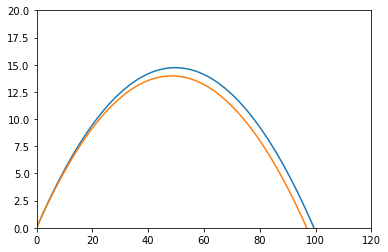

In [83]:
plt.ylim(0,20)
plt.xlim(0,120)
plt.plot(xp, yp)
plt.plot(x_gt2, y_gt2)
plt.show()

Our *approxomation* calculations are not correct, but they are close. If we make the time step even smaller, we will get closer and closer to the "real" plot. Mathematically we say:
    
$$
\lim_{{dt}\to 0} f_{approx}(t) = f_{real}(t)
$$

In a lot of engineering work, we often cannot find the real function, but we can easily figure out the approximate function. We learn how to work with the errors we know will result from our approximations! (Mathematicians are never happy with this approximation scheme, they will spend hours searching for that "real" function!)

## flying with gravity

To close out this discussion, let's animate our new gravity solution.

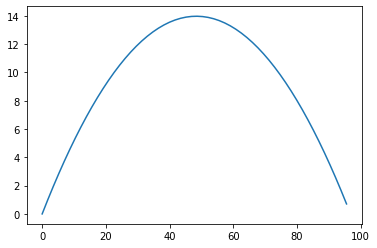

In [84]:
filenames = []
for i in range(len(t2)):
    # plot the line chart
    plt.plot(x_gt2[:i], y_gt2[:i])
    if y_gt2[i] < 0: break
    plt.ylim(0,20)
    plt.xlim(0,120)
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('gravity-flight.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

I added a ine that checks to see if our model has hit the ground, and stopped the loop if so. 

![Gravity Flight](files/gravity-flight.gif)